In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from scipy import stats
#pip install researchpy
import researchpy as rp
from scipy.stats import shapiro
from scipy.stats import f
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import bartlett
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math

# Partie 1 : Vue générale et nettoyage des fichiers

## 1.1 Vue générale et nettoyage du fichier Customers

### Analyse du fichier

In [2]:
#Ouverture du fichier customers
customers=pd.read_csv("customers.csv")

In [3]:
#On affiche une partie du dataframe du fichier customers
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#On affiche les infos de customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
#Affichage des stats générales de customers
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


## On va ajouter une colonne qui va nous donner l'âge des clients

In [6]:
#Ajout de la colonne age 
customers['age'] = date.today().year - customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [7]:
#On affiche les stats de l'âge des clients du fichier customers
customers['age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

### Les clients ont entre 18 et 93 ans et ont en moyenne 43 ans

### Nettoyage Customers
### On va chercher et vérifier: 
### -Les NaN 
### -Les doublons 
### -Les noms des colonnes

In [8]:
# Recherche des valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
age          0
dtype: int64

In [9]:
#On affiche la somme des doublons des clients s'il en existe
customers.duplicated('client_id').sum()

0

#### client_id n'a pas de doublon

## 1.2 Analyse et nettoyage du fichier products

In [10]:
#Ouverture du fichier products.csv
products=pd.read_csv("products.csv")

In [11]:
#On affiche un morceau de products
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [12]:
#On affiche les infos de products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [13]:
#On affiche les stats de products
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


### Nettoyage products
### On va chercher et vérifier: 
### -Les NaN 
### -Les doublons 
### -Les noms des colonnes

In [14]:
# Recherche des valeurs manquantes
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [15]:
#On affiche la somme des doublons des clients s'il en existe
products.duplicated('id_prod').sum()

0

#### id_prod n'a pas de doublon

## 1.3 Analyse et nettoyage du fichier transactions

In [16]:
#Ouverture du fichier transactions.csv
transactions=pd.read_csv("transactions.csv")

In [17]:
#On affiche le debut de transactions
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [18]:
#On affiche les infos de transactions
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [19]:
#On affiche les stats de transactions
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


### Nettoyage transactions
### On va chercher et vérifier: 
### -Les NaN 
### -Les doublons 
### -Les noms des colonnes

In [20]:
#On va calculer la somme des valeurs nulles s'il en existe
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [21]:
#On affiche la somme des doublons des transactions s'il en existe
products.duplicated('id_prod').sum()

0

#### id_prod n'a pas de doublon

# Partie 2 : Rapprochement entre les fichiers

## 2.1 Rapprochement entre le fichier transaction et le fichier produits

### On va faire un premier rapporchement  entre le fichier de transaction et le fichier de produits sur la clé id_product afin d'avoir pour chaque session: les produits achetés, les prix, la catégorie et le client concerné

In [22]:
#On effectue un left join afin d'obtenir tous les résultats du fichier product 
df_pt = pd.merge(products, transactions, how='left', on=['id_prod']) 

In [23]:
#On affiche les infos du dataframe contenant la fusion entre products et transactions
df_pt.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298


In [24]:
#Puis on ajoute le fichier customers
df_fusionne = pd.merge(customers, df_pt, on=['client_id']) 

In [25]:
#On affiche le début du nouveau dataframe fusionné
df_fusionne.head()

,client_id,sex,birth,age,id_prod,price,categ,date,session_id
0,c_4410,f,1967,55,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,55,1_385,25.99,1,2023-02-22 01:40:22.782925,s_345108
2,c_4410,f,1967,55,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715
3,c_4410,f,1967,55,0_1111,19.99,0,2023-02-22 01:27:49.480137,s_345108
4,c_4410,f,1967,55,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707


In [26]:
df_fusionne.describe()

,birth,age,price,categ
count,679311.000000,679311.000000,679311.000000,679311.000000
mean,1977.817976,44.182024,17.449340,0.441823
std,13.579191,13.579191,18.329034,0.595002
min,1929.000000,18.000000,-1.000000,0.000000
25%,1970.000000,35.000000,8.820000,0.000000
50%,1980.000000,42.000000,13.990000,0.000000
75%,1987.000000,52.000000,18.990000,1.000000
max,2004.000000,93.000000,300.000000,2.000000


### Allons voir de plus près le prix negatif (min)

In [27]:
df_fusionne.loc[df_fusionne.price== -1.0]

,client_id,sex,birth,age,id_prod,price,categ,date,session_id
218100,ct_0,f,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237419,s_0
218101,ct_0,f,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237425,s_0
218102,ct_0,f,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237436,s_0
218103,ct_0,f,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237430,s_0
218104,ct_0,f,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0
...,...,...,...,...,...,...,...,...,...
670673,ct_1,m,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237420,s_0
670674,ct_1,m,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237427,s_0
670675,ct_1,m,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237449,s_0
670676,ct_1,m,2001,21,T_0,-1.0,0,test_2021-03-01 02:30:02.237424,s_0


### On peut voir que ce sont des tests 
### On va donc supprimer les tests que l'on peut repérer au niveau de date

In [28]:
#On retire les lignes contenant le mot test dans la colonne date
df_fusionne = df_fusionne[~df_fusionne.date.str.contains("test")]

In [29]:
df_fusionne.loc[df_fusionne.price== -1.0]

,client_id,sex,birth,age,id_prod,price,categ,date,session_id


In [30]:
df_fusionne.describe()

,birth,age,price,categ
count,679111.000000,679111.000000,679111.000000,679111.000000
mean,1977.811149,44.188851,17.454773,0.441953
std,13.575361,13.575361,18.328998,0.595042
min,1929.000000,18.000000,0.620000,0.000000
25%,1970.000000,35.000000,8.870000,0.000000
50%,1980.000000,42.000000,13.990000,0.000000
75%,1987.000000,52.000000,18.990000,1.000000
max,2004.000000,93.000000,300.000000,2.000000


In [31]:
df_fusionne.head()

,client_id,sex,birth,age,id_prod,price,categ,date,session_id
0,c_4410,f,1967,55,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967,55,1_385,25.99,1,2023-02-22 01:40:22.782925,s_345108
2,c_4410,f,1967,55,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715
3,c_4410,f,1967,55,0_1111,19.99,0,2023-02-22 01:27:49.480137,s_345108
4,c_4410,f,1967,55,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707


In [32]:
#On retire les lignes contenant le chiffre 2023 dans la colonne date
df_fusionne=df_fusionne[~df_fusionne.date.str.contains("2023")]

In [33]:
df_fusionne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624458 entries, 0 to 679310
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   624458 non-null  object 
 1   sex         624458 non-null  object 
 2   birth       624458 non-null  int64  
 3   age         624458 non-null  int64  
 4   id_prod     624458 non-null  object 
 5   price       624458 non-null  float64
 6   categ       624458 non-null  int64  
 7   date        624458 non-null  object 
 8   session_id  624458 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 47.6+ MB


### Le fichier est prêt, nous pouvons maintenant passer à l'analyse

# Partie 3 : Analyse

In [34]:
#On Groupby selon le numéro de transaction
df_commandes = df_fusionne.groupby(['session_id', 'client_id', "age"]).agg({'date':'max',                                                                       "session_id":"count", 'price':'sum'})
df_commandes.rename(columns={'session_id':"number_items"}, inplace=True)
df_commandes = df_commandes.reset_index()
df_commandes.head()

,session_id,client_id,age,date,number_items,price
0,s_1,c_329,55,2021-03-01 00:01:07.843138,1,11.99
1,s_10,c_2218,52,2021-03-01 00:10:33.163037,1,26.99
2,s_100,c_3854,44,2021-03-01 04:43:58.025677,2,33.72
3,s_1000,c_1014,33,2021-03-03 03:25:12.320225,4,39.22
4,s_10000,c_476,33,2021-03-22 18:15:03.831240,3,41.49


## 3.1 Etude du chiffre d'affaire 

In [35]:
#Affichage de la date min
df_fusionne.date.min()

'2021-03-01 00:01:07.843138'

In [36]:
#Affichage de la date max
df_fusionne.date.max()

'2022-12-31 23:56:47.244655'

### Le chiffre d'affaire est donné pour les années 2021 à 2022

In [37]:
#Calcul du chiffre d'affaire de 2021 à 2022
CA = round(df_fusionne['price'].sum(), 2)
print("Le chiffre d'affaire de 2021 à 2022 est de",CA,"€")

Le chiffre d'affaire de 2021 à 2022 est de 10876557.84 €


In [38]:
#On sépare la date de l'heure
df_fusionne[["date", "hour"]] = df_fusionne.date.str.split(" ", expand=True)

In [39]:
#Convertion de la date en datetime
df_fusionne['date']=pd.to_datetime(df_fusionne['date'])

In [40]:
#Création d'une colonne année
df_fusionne["année"]=df_fusionne.date.dt.year

In [41]:
#Création d'une colonne mois
df_fusionne["mois"]=df_fusionne.date.dt.month

In [42]:
#Création d'une colonne jour
df_fusionne["jour"]=df_fusionne.date.dt.day

In [43]:
df_fusionne

,client_id,sex,birth,age,id_prod,price,categ,date,session_id,hour,année,mois,jour
0,c_4410,f,1967,55,1_385,25.99,1,2021-03-22,s_9707,01:40:22.782925,2021,3,22
2,c_4410,f,1967,55,0_1110,4.71,0,2021-11-04,s_114715,16:28:30.169021,2021,11,4
4,c_4410,f,1967,55,0_1111,19.99,0,2021-03-22,s_9707,01:27:49.480137,2021,3,22
5,c_4410,f,1967,55,1_461,12.99,1,2021-08-11,s_74236,08:40:47.495793,2021,8,11
6,c_4410,f,1967,55,1_461,12.99,1,2022-09-11,s_266422,08:40:47.495793,2022,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679306,c_84,f,1982,40,0_1438,9.31,0,2022-05-29,s_215697,06:11:50.316631,2022,5,29
679307,c_84,f,1982,40,0_1438,9.31,0,2022-03-29,s_186172,06:11:50.316631,2022,3,29
679308,c_84,f,1982,40,1_459,15.99,1,2022-12-17,s_313173,00:16:56.629536,2022,12,17
679309,c_84,f,1982,40,1_459,15.99,1,2022-02-17,s_166337,00:16:56.629536,2022,2,17


## Chiffre d'affaires par année

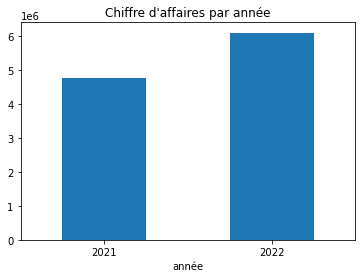

In [44]:
df_fusionne.groupby('année')['price'].sum().plot(kind = 'bar')
plt.title('Chiffre d\'affaires par année')
plt.xticks(rotation=0, ha='center')
plt.show()

## Chiffre d'affaires mensuel

In [45]:
ca_mois = df_fusionne[["price","date"]].set_index("date").groupby(pd.Grouper(freq="M")).sum()

In [46]:
ca_mois

,price
date,
2021-03-31,482359.60
2021-04-30,475918.37
2021-05-31,492801.97
2021-06-30,483989.48
2021-07-31,482680.99
2021-08-31,482126.16
2021-09-30,506964.78
2021-10-31,320790.75
2021-11-30,516137.68


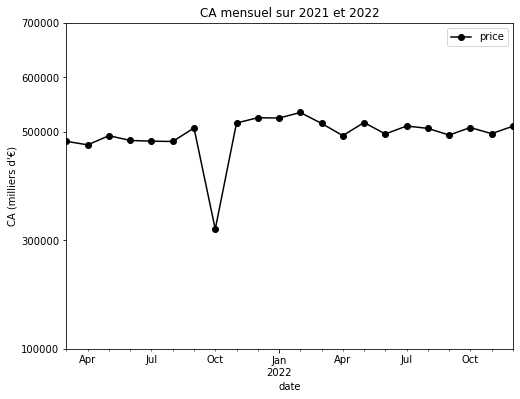

In [47]:
#On regarde l'evolution du chiffre d'affaires mensuel sur les 2 années
ca_mois.plot(figsize=(8,6),marker="o",color="black",yticks=(100000,300000,500000,600000,700000))
plt.title("CA mensuel sur 2021 et 2022")
plt.ylabel("CA (milliers d'€)")
plt.show()


### Analyse des ventes en octobre

In [48]:
#On Stock dans la variable toutes les commandes passées en octobre 2021
df_octobre_2021 = df_fusionne.loc[(df_fusionne['année']==2021) & (df_fusionne['mois']==10),:]

In [49]:
#On effectue la somme du chiffre d'affaire par catégorie et par jour
df_octobre_2021 = pd.pivot_table(df_octobre_2021, index = ['jour'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

In [50]:
#Apperçu du chiffre d'affaires de chaque catégorie au mois d'Octobre
df_octobre_2021.sum()

categ
0    199242.84
1     33762.32
2     87785.59
dtype: float64

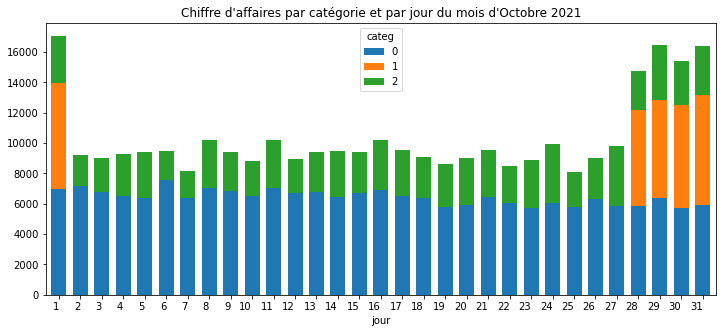

In [51]:
#On affiche le tout sous forme de bar
df_octobre_2021.plot(kind='bar',stacked = True,figsize=(12,5),width = 0.7)
plt.title("Chiffre d'affaires par catégorie et par jour du mois d'Octobre 2021")
plt.xticks(rotation =0,ha='right')
plt.show()

### On remarque l'absence d'achat des produits de la catégorie 1 entre le 2 et le 28 octobre 2021. Deux hypothèses s'imposent : un arrêt des ventes de catégorie 1 à ce moment, ou plus probablement un bug informatique qui a empêché d'obtenir les données de ventes qui ont eu lieu



## Affichage des chiffres journaliers 

In [52]:
ca_days=df_fusionne[["price","date"]].set_index("date").groupby(pd.Grouper(freq="D")).sum()

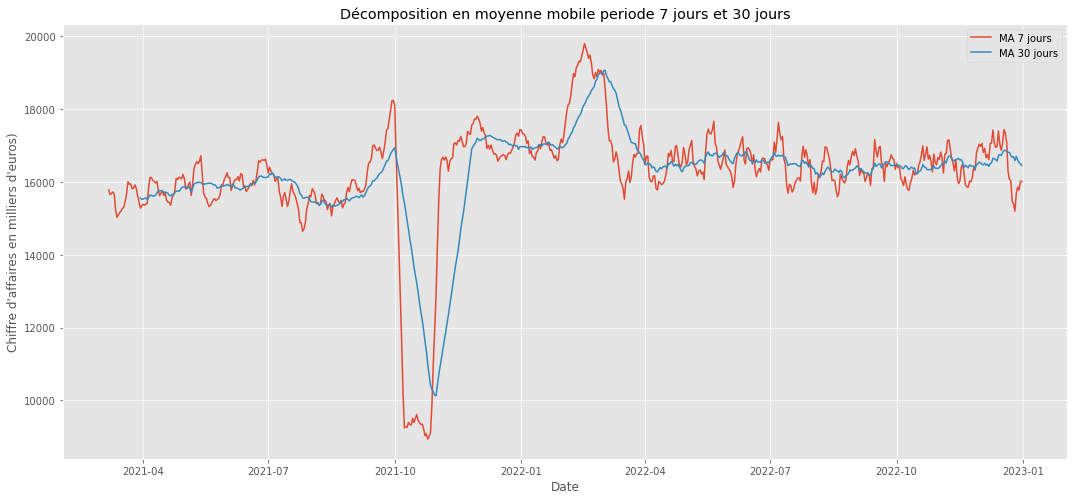

In [53]:
#On affiche une decomposition en moyenne mobile pour une periode de 7 et 30 jours

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.plot(ca_days.rolling(7).mean(),label= 'MA 7 jours')
plt.plot(ca_days.rolling(30).mean(),label= 'MA 30 jours')
plt.legend(loc='best')
plt.title('Décomposition en moyenne mobile periode 7 jours et 30 jours')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires en milliers d'euros)")
plt.show()

# Partie 4 : Zoom sur les références

## 4.1 Top des articles

In [54]:
df_prod = df_fusionne.groupby('id_prod').agg({"id_prod":"count", 'price':'sum'})
df_prod.rename(columns={"id_prod":"number_purchases", "price":"monetary_value"}, inplace=True)

In [55]:
#On va trier le dataframe selon les meilleurs produits en terme de CA 
meilleurs_prod_montant = df_prod.sort_values(by=['monetary_value'], ascending = False)

### Top produits en terme de CA

In [56]:
#Affichage des produits qui ont rapporté le plus d'argent
meilleurs_prod_montant.head()

,number_purchases,monetary_value
id_prod,,
2_159,597,87156.03
2_135,928,64022.72
2_112,872,58921.04
2_102,924,54645.36
2_209,745,52142.55


### Top produits en terme de ventes

In [57]:
#On va trier le dataframe selon les meilleurs produits en terme de ventes
meilleurs_prod_nb_achats = df_prod.sort_values(by=['number_purchases'], ascending = False)

In [58]:
#Produits les plus vendus
meilleurs_prod_nb_achats.head()

,number_purchases,monetary_value
id_prod,,
1_369,2048,49131.52
1_417,2029,42588.71
1_414,1977,47111.91
1_498,1966,45945.42
1_425,1918,32586.82


## 4.2 Flop des articles

### Flop produits en terme de CA

In [59]:
#Tri dans l'ordre décroissant pour avoir les plus grandes valeurs en premier
pire_prod_montant = df_prod.sort_values(by=['monetary_value'], ascending = True)

In [60]:
#Affichage des pires produits en terme de CA
pire_prod_montant.head()

,number_purchases,monetary_value
id_prod,,
0_1539,1,0.99
0_1840,1,1.28
0_1284,1,1.38
0_1653,2,1.98
0_541,1,1.99


### Flop produits en terme de ventes

In [61]:
pires_prod_nb_achats = df_prod.sort_values(by=['number_purchases'], ascending = True)

In [62]:
#Affichage des pires produits en terme de ventes
pires_prod_nb_achats.head()

,number_purchases,monetary_value
id_prod,,
0_886,1,21.82
0_1633,1,24.99
0_1728,1,2.27
2_77,1,145.99
0_1379,1,2.99


### Répartition par catégories

In [63]:
# On Crée un sous-df avec un groupby sur la colonne "categ"

df_categ = df_fusionne.groupby(["categ"]).agg({"client_id" : 'count', "price" : "sum"})

df_categ.rename(columns={"client_id" : "total_purchases", "price" : "monetary_value"}, inplace=True)

df_categ=pd.DataFrame(df_categ)
df_categ.reset_index(inplace=True)

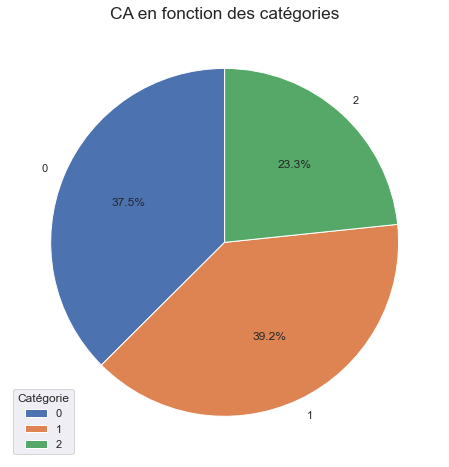

In [64]:
#On affiche le CA en fonction des catégories
sns.set()
plt.figure(figsize=(8,8))
plt.pie(df_categ.monetary_value, labels=df_categ.categ, shadow=False, startangle=90, autopct='%1.1f%%')
plt.title("CA en fonction des catégories", fontsize = 'x-large')
plt.legend(title="Catégorie")
plt.show()

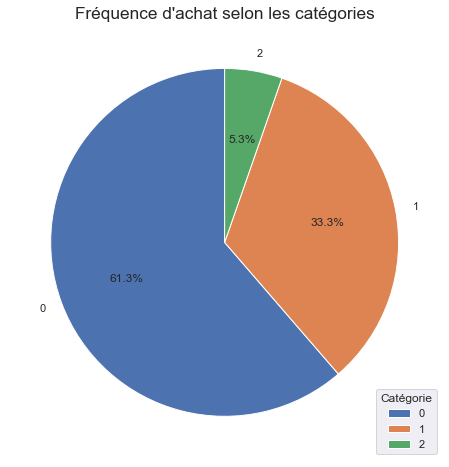

In [65]:
#On affiche la fréquence d'achat selon les catégories
plt.figure(figsize=(8,8))
plt.pie(df_categ.total_purchases, labels=df_categ.categ, shadow=False, startangle=90, autopct='%1.1f%%')
plt.title("Fréquence d'achat selon les catégories", fontsize = 'x-large')
plt.legend(title="Catégorie")
plt.show()


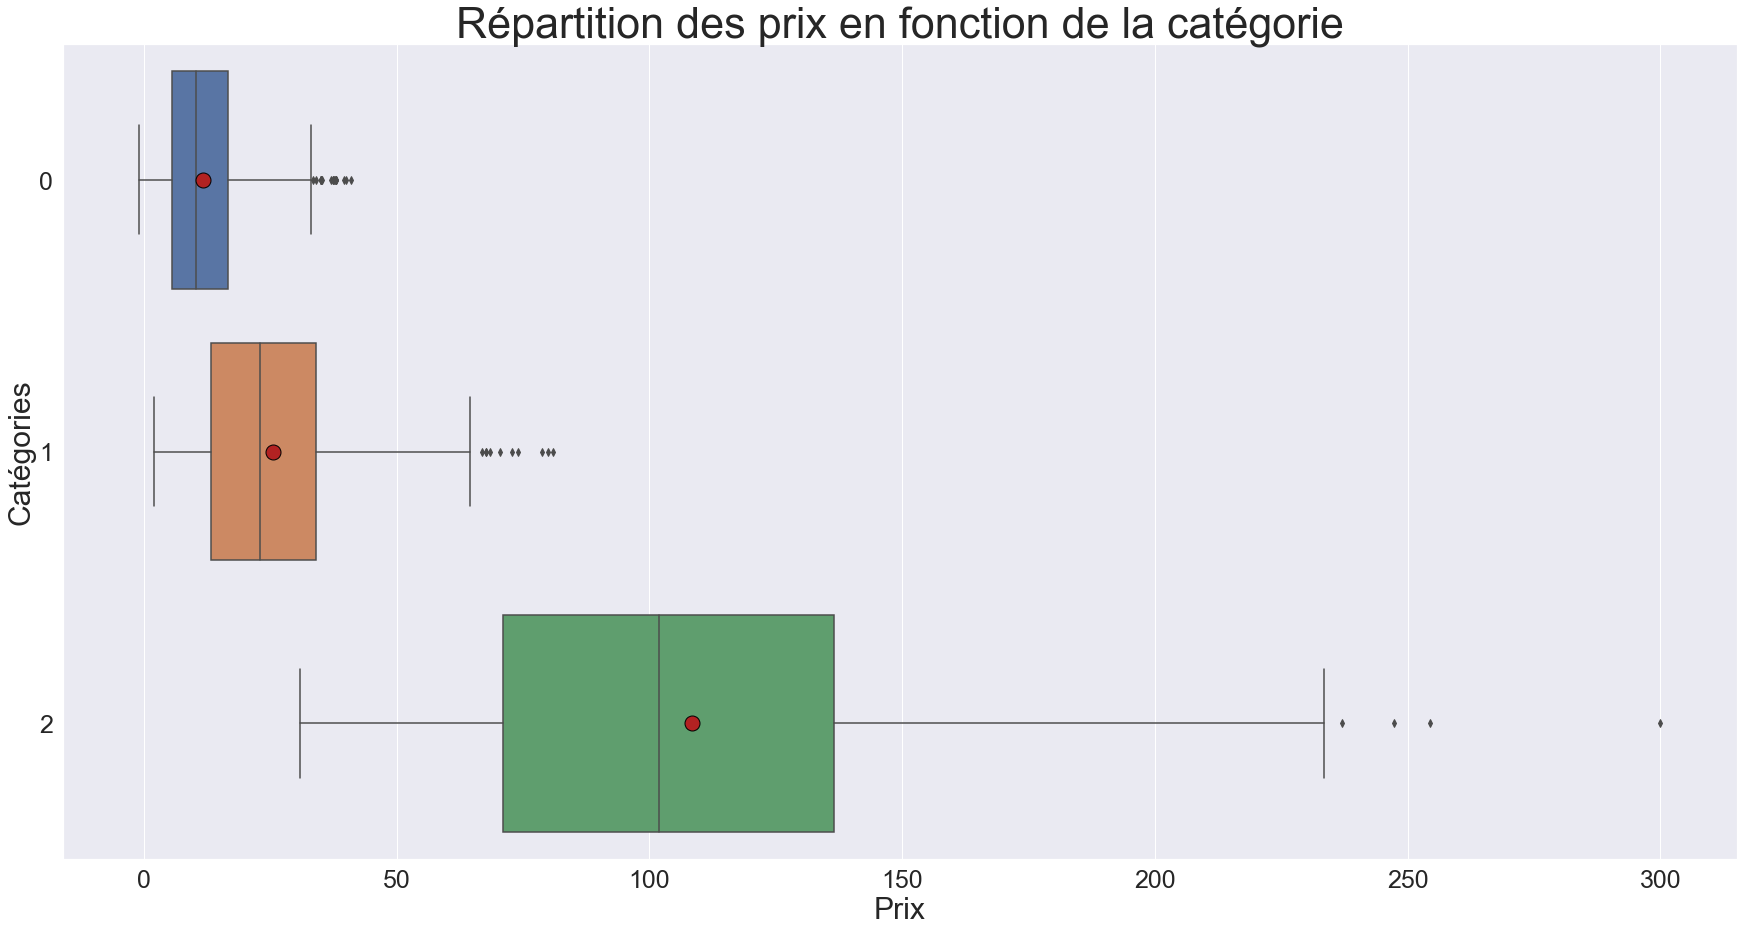

In [66]:
products.categ=products.categ.astype("category")

meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick', "markersize":'15'}

plt.figure(figsize=(30,15))
sns.boxplot(y="categ", x="price",data=products, showmeans=True, meanprops=meanprops)
plt.title('Répartition des prix en fonction de la catégorie', fontsize='43')
plt.xlabel('Prix', fontsize='30')
plt.ylabel("Catégories", fontsize='30')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# Partie 5 : Analyse des clients


In [67]:
#On répartit en fonction de l'âge et du sexe

clients_age = df_fusionne[["client_id", "age", "sex"]].groupby("client_id").max()
clients_age = pd.DataFrame(data=clients_age, columns=['age', 'sex'])
clients_age.head()

,age,sex
client_id,,
c_1,67,m
c_10,66,m
c_100,30,m
c_1000,56,f
c_1001,40,m


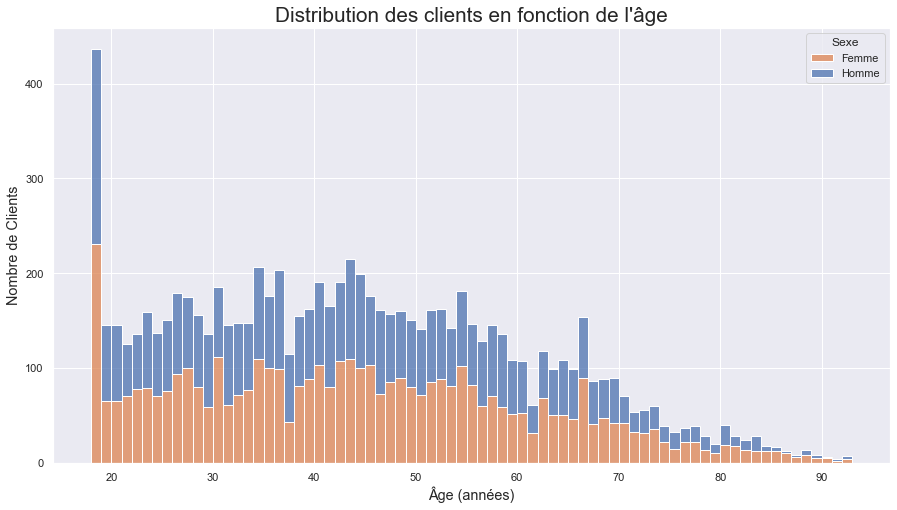

In [68]:
#On affiche un graphique en fonction de l'age et du sexe des clients corriger graphe
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15,8))
plt.title("Distribution des clients en fonction de l'âge", fontsize='xx-large')
plt.xlabel('Âge (années)', fontsize='large')
plt.ylabel('Nombre de Clients', fontsize='large')
sns.histplot(data=clients_age, x="age", hue="sex", multiple="stack", bins=75)
plt.legend(["Femme", "Homme"], title="Sexe")
plt.show()

In [69]:
#On masque la tranche d'age 18 ans pour effectuer un test de student
df_student=df_fusionne.mask(df_fusionne.age==18)
rp.ttest(group1= df_student['age'][df_student['sex']=='m'], group1_name = 'Male',
        group2= df_student['age'][df_student['sex']=='f'], group2_name = 'Female')

C:\Users\YaniSai\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable         N       Mean         SD        SE  95% Conf.   Interval
 0      Male  306959.0  44.194195  12.800503  0.023104  44.148912  44.239478
 1    Female  303719.0  45.378317  13.401883  0.024318  45.330654  45.425980
 2  combined  610678.0  44.783115  13.116406  0.016785  44.750218  44.816012,
               Independent t-test      results
 0  Difference (Male - Female) =       -1.1841
 1          Degrees of freedom =   610676.0000
 2                           t =      -35.3097
 3       Two side test p value =        0.0000
 4      Difference < 0 p value =        0.0000
 5      Difference > 0 p value =        1.0000
 6                   Cohen's d =       -0.0904
 7                   Hedge's g =       -0.0904
 8              Glass's delta1 =       -0.0925
 9            Point-Biserial r =       -0.0451)

In [70]:
# On Contrôle la normalité des échantillons 'age' et 'sex'

X1 = df_student['age'][df_student['sex']=='m']

X2 = df_student['age'][df_student['sex']=='f']

x1, pval1 = shapiro(X1)

x2, pval2 = shapiro(X2)

print(pval1)

print(pval2)

C:\Users\YaniSai\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0
0.0


In [71]:
#On Contrôle l'égalité des variances :

# Fisher-Snedecor F-test

f(X1,X2)


# Anova unidirectionnelle

stats.f_oneway(X1,X2)

F_onewayResult(statistic=1246.7745413716862, pvalue=7.879212718921483e-273)

In [72]:
#On Compare les deux échantillons pour voir s'ils sont significativement différents

y = stats.ttest_ind(X1,X2) ; print(y)

Ttest_indResult(statistic=-35.30969472215366, pvalue=7.879212724264958e-273)


In [73]:
#On affiche le nombre de clients uniques
df_fusionne.client_id.value_counts().shape

(8600,)

In [74]:
# Je regroupe mes données par client_id et j'affiche le montant de leurs achats.
df_client = df_fusionne.groupby('client_id',)[['price']].sum();
df_client.head()

,price
client_id,
c_1,513.89
c_10,1189.11
c_100,254.85
c_1000,2168.99
c_1001,1669.27


In [75]:
# Je tri les données de la colonne price par ordre décroissant pour avoir les clients ayant dépensé le plus
df_client.sort_values('price', ascending = False)

,price
client_id,
c_1609,299489.27
c_4958,266768.28
c_6714,139623.29
c_3454,103881.22
c_3263,5025.11
...,...
c_4648,11.20
c_240,11.06
c_8114,9.98


### On a 4 gros clients, probablement des entreprises 

In [76]:
# Je crée un nouveau dataframe qui contient toutes les données des 4 clients
df_4_clients = df_fusionne.loc[(df_fusionne['client_id']=='c_1609')|(df_fusionne['client_id']=='c_4958')|(df_fusionne['client_id']=='c_6714')
                      |(df_fusionne['client_id']=='c_3454'),:]

In [77]:
df_4_clients

,client_id,sex,birth,age,id_prod,price,categ,date,session_id,hour,année,mois,jour
101787,c_4958,m,1999,23,1_587,4.99,1,2022-10-17,s_283920,18:53:48.958205,2022,10,17
101788,c_4958,m,1999,23,1_587,4.99,1,2022-08-17,s_254678,18:53:48.958205,2022,8,17
101789,c_4958,m,1999,23,1_587,4.99,1,2021-11-17,s_121110,18:53:48.958205,2021,11,17
101790,c_4958,m,1999,23,1_587,4.99,1,2022-04-17,s_195468,18:53:48.958205,2022,4,17
101791,c_4958,m,1999,23,2_228,225.17,2,2022-06-06,s_219702,14:19:53.356847,2022,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640600,c_3454,m,1969,53,1_651,18.99,1,2021-03-10,s_4474,17:09:23.564749,2021,3,10
640601,c_3454,m,1969,53,1_651,18.99,1,2022-08-25,s_258288,14:43:08.578786,2022,8,25
640602,c_3454,m,1969,53,0_2001,7.99,0,2022-01-16,s_150684,14:26:31.241993,2022,1,16
640603,c_3454,m,1969,53,1_387,9.99,1,2022-04-14,s_193823,06:58:26.437656,2022,4,14


In [78]:
moyenne_ca = (df_4_clients['price'].sum()/df_fusionne['price'].sum())*100
print("Les 4 plus gros clients représentent environ", round((moyenne_ca),2),"%" , "du chiffre d'affaire total")

Les 4 plus gros clients représentent environ 7.45 % du chiffre d'affaire total


In [79]:
# Je crée une dataframe par client
client_1609 = df_4_clients.loc[df_4_clients['client_id']=='c_1609',:]
client_4958 = df_4_clients.loc[df_4_clients['client_id']=='c_4958',:]
client_6714 = df_4_clients.loc[df_4_clients['client_id']=='c_6714',:]
client_3454 = df_4_clients.loc[df_4_clients['client_id']=='c_3454',:]

In [80]:
# J'effectue un pivot en prenant comme index l'anéne et le mois, j'affiche les catégories de produits et le CA par catégorie
client_1609_categ = pd.pivot_table(client_1609, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_4958_categ = pd.pivot_table(client_4958, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_6714_categ = pd.pivot_table(client_6714, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});
client_3454_categ = pd.pivot_table(client_3454, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'});

## On va afficher les dépenses par catégorie de ces 4 gros clients 

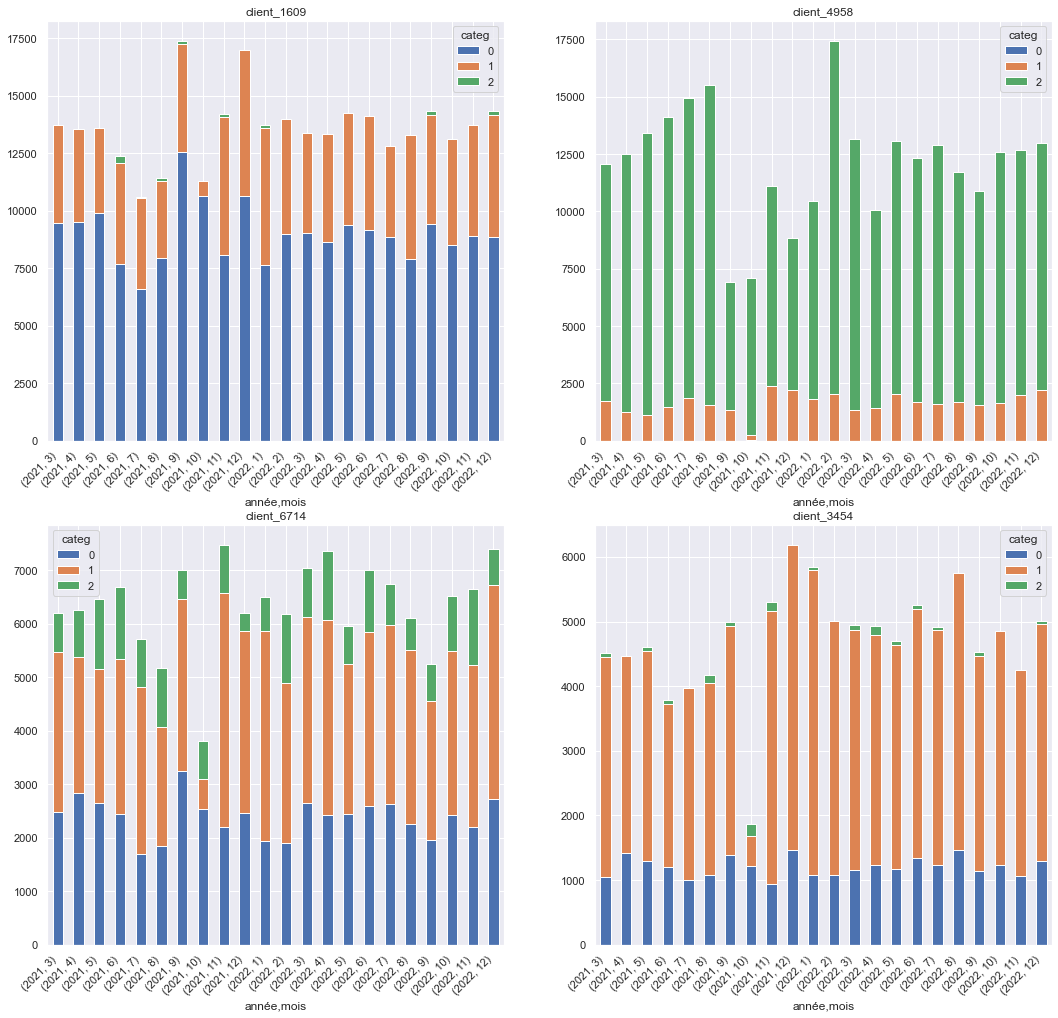

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 17))

client_1609_categ.plot(kind= 'bar',stacked = True, ax=axes[0,0]); axes[0,0].set_title('client_1609'); 


client_4958_categ.plot(kind= 'bar',stacked = True, ax=axes[0,1]); axes[0,1].set_title('client_4958')


client_6714_categ.plot(kind= 'bar',stacked = True, ax=axes[1,0]); axes[1,0].set_title('client_6714')


client_3454_categ.plot(kind= 'bar',stacked = True, ax=axes[1,1]); axes[1,1].set_title('client_3454')

for ax in fig.axes:
    plt.sca(ax) # définit l’Axes courant à celui fourni par l’objet ax
    plt.xticks(rotation=45, ha ='right')
    
plt.show()

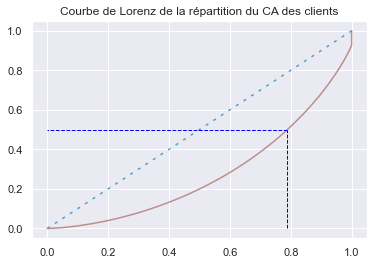

indice de gini: 0.45


In [82]:
#Création de la courbe de Lorenz
cum = df_client.cumsum()
dep = df_client['price']
n = len(cum)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection

plt.plot(np.linspace(0,1,len(lorenz)), lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.plot(np.linspace(0,1,len(lorenz)), np.linspace(0,1,len(lorenz)), dashes=[2,4], color='#539ecd')

plt.vlines(medial, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients')
plt.show()

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)
S = 0.5 - aire_ss_courbe
gini = 2*S
print(f'indice de gini: {gini:.2f}')

### 80% des gros clients apportent 45% du chiffre d'affaires

## Partie 6 : Correlations

### 6.1 Lien entre le genre d’un client et les catégories des livres achetés

### Les vatiables "genre" et "catégories" sont des variables qualitatives, je vais donc les analyser comme ce qui suit :
<ul>
<li>Tableau de contingence</li>
<li>khi-deux</li>
<li>Heatmap</li>
</ul>

### Dans cette partie, nous allons exclure les données des 4 gros clients, on va donc supprimer les lignes où le client est c_1609, c_4958, c_6714, c_3454

In [83]:
#On masque les quatre outliers rencontrés en (plus gros montant), et les valeurs qui ont pour âge "18" qui ne sont pas repésentatif (outliers)
df_fusionne=df_fusionne.mask(df_fusionne.age==18)

df_fusionne.drop( df_fusionne[ df_fusionne['client_id'] == "c_1609" ].index, inplace=True)
df_fusionne.drop( df_fusionne[ df_fusionne['client_id'] == "c_4958" ].index, inplace=True)
df_fusionne.drop( df_fusionne[ df_fusionne['client_id'] == "c_6714" ].index, inplace=True)
df_fusionne.drop( df_fusionne[ df_fusionne['client_id'] == "c_3454" ].index, inplace=True) 

df_commandes=df_commandes.mask(df_commandes.age==18)
df_commandes.drop( df_commandes[ df_commandes['client_id'] == "c_1609" ].index, inplace=True)
df_commandes.drop( df_commandes[ df_commandes['client_id'] == "c_4958" ].index, inplace=True)
df_commandes.drop( df_commandes[ df_commandes['client_id'] == "c_6714" ].index, inplace=True)
df_commandes.drop( df_commandes[ df_commandes['client_id'] == "c_3454" ].index, inplace=True)

### 6.1.1) Création d'un tableau de contingence


In [84]:
#Tableau de contingence
X="categ"
Y="sex"
cs=df_fusionne[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
cs.head()

sex,f,m
categ,,
0.0,183296,170647
1.0,99295,89929
2.0,12709,11864


### Nous pouvons voir qu'il y a plus de ventes chez les femmes que chez les hommes dans toutes les catégories

### 6.1.2) Calcul du coefficient de Khi2


### Test de Khi2
#### Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
#### H0: Les deux variables (le genre d’un client et les catégories des livres achetés ) sont indépendantes
#### H1: les deux variables ne sont pas indépendantes

In [85]:
cont=cs.copy()
tx=df_fusionne[X].value_counts()
ty=df_fusionne[Y].value_counts()

cont.loc[:,"Total"]=tx
cont.loc["Total",:]=ty
cont.loc["Total","Total"]=len(df_fusionne)
cont

sex,f,m,Total
categ,,,
0.0,183296.0,170647.0,353943.0
1.0,99295.0,89929.0,189224.0
2.0,12709.0,11864.0,24573.0
Total,295300.0,272440.0,581520.0


In [86]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(cont)
chi2, degrees, pvalue

(106.53631030061733, 6, 1.0817869026152934e-20)

#### Notre p-value < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables genre et catégorie de produits sont dépendantes.


### 6.1.3) Heatmap

- Achats par catégorie selon le genre

In [87]:
#Corrélation sexe des clients / catégorie de produits achetés

#qualitatif/ qualitatif

# Tableau de contingence réel
df_fusionne.categ=df_fusionne.categ.astype("float64")

X="categ"
Y="sex"
cs=df_fusionne[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
cs.head()

sex,f,m
categ,,
0.0,183296,170647
1.0,99295,89929
2.0,12709,11864


In [88]:
cont=cs.copy()
tx=df_fusionne[X].value_counts()
ty=df_fusionne[Y].value_counts()

cont.loc[:,"Total"]=tx
cont.loc["total",:]=ty
cont.loc["total","Total"]=len(df_fusionne)
cont

sex,f,m,Total
categ,,,
0.0,183296.0,170647.0,353943.0
1.0,99295.0,89929.0,189224.0
2.0,12709.0,11864.0,24573.0
total,295300.0,272440.0,581520.0


In [89]:
#Tableau de contingence théorique

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ['foo']
ty.columns= ['foo']
n = len(df_fusionne)
indep = tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep

,f,m
0.0,179734.777652,165821.005159
1.0,96089.295639,88650.754162
2.0,12478.344511,11512.360916


Chaque valeur de chaque case du Heatmap est une mesure de la contribution à la non-indépendance entre la catégorie de produit et le genre, qui prend des valeurs entre 0 et 1. 0 représentant une source d'indépendance, et 1 une source de non-indépendance.

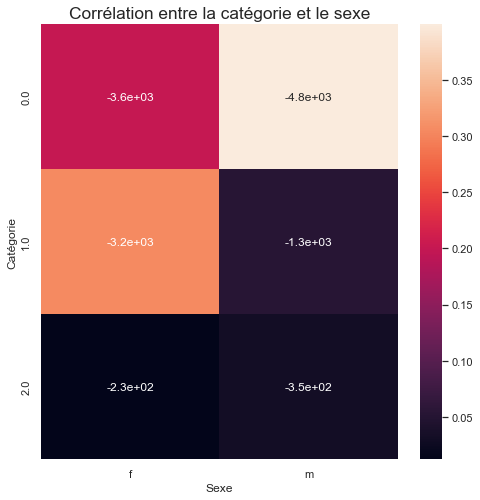

In [90]:
mesure = (cs-indep)**2/indep
xi_n = mesure.sum().sum()

plt.figure(figsize=(8,8))
sns.heatmap(mesure/xi_n, annot=indep - cs)
plt.title("Corrélation entre la catégorie et le sexe", fontsize = 'x-large')
plt.xlabel("Sexe")
plt.ylabel("Catégorie")
plt.show()


### Avec la heatmap, On constate que:

Il y a une incidence moyenne sur la catégorie 0 et 2 (plus forte chez les hommes) et une forte incidence sur la catégorie 1 (plus forte chez les femmes que chez les hommes)

La répartition des catégories d'achat entre hommes et femmes est quasi équivalente si on prend les proportions de chacunes des catégories

 

## 6.2 Corrélation âge des clients et montant total des achats


### Nous avons ici deux variables quantitatives (age et montant), je vais donc les analyser comme ce qui suit :
<ul>
<li>Visualisation avec nuage de points avec la régression linéaire</li>
<li>Test de corrélation (pearson)</li>
</ul>

In [91]:
# Créer la dataframe avec âge et somme de CA
age_ca = df_fusionne.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum', ascending=False).reset_index()
age_ca.head()

,age,count,sum
0,43.0,22980,308805.59
1,34.0,22855,302162.71
2,44.0,22756,298795.59
3,36.0,21604,284467.94
4,42.0,20127,265688.37


(18.0, 95.0)

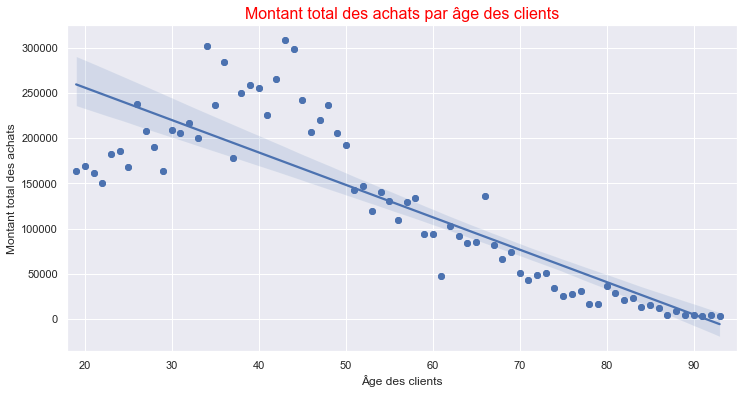

In [92]:
# Visualisation de CA en fonction d'âge des clients
plt.figure(figsize=(12, 6))
sns.regplot(x='age', y='sum', data = age_ca)
plt.scatter(age_ca['age'],age_ca['sum'])
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge des clients",fontsize= 16, color = 'red')
plt.xlim(18,95)

### Test de corrélation (pearson)


In [93]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['sum'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['sum'])[0])

La covariance est de: -1681571.6897333334
Le coefficient de corrélation linéaire est de: -0.8536327525064258


#### En utilisant le test de Pearson, j’obtient un coefficient de -0.85. Il représente une forte corrélation entre l’âge des clients et le montant total des achats : Plus un client est âgé et moins le montant total des achats sera élevé. (Visible via la régression linéaire)

## 6.3 Correlation age et fréquence d'achats

Pour tester deux variables quantitatives, je utilise:

- La Visualisation avec nuage de points avec la régression linéaire

- Le Test de corrélation (pearson)

(18.0, 95.0)

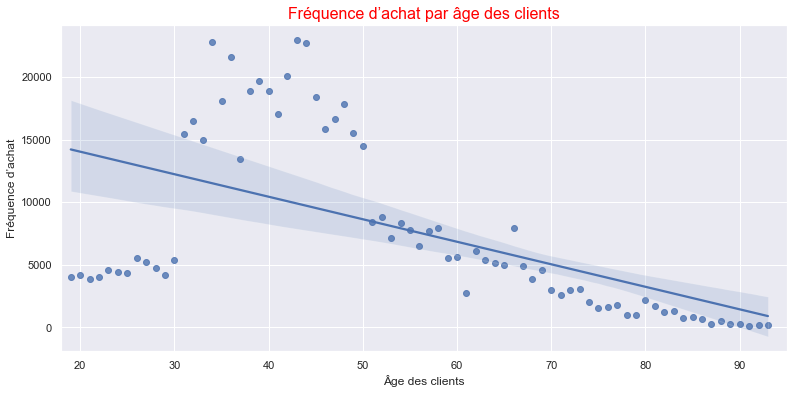

In [94]:
plt.figure(figsize=(13, 6))
sns.regplot(x='age', y='count', data = age_ca)
plt.ylabel( 'Fréquence d’achat')
plt.xlabel('Âge des clients')
plt.title("Fréquence d’achat par âge des clients",fontsize= 16, color = 'red')
plt.xlim(18,95)

In [95]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['count'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['count'])[0])

La covariance est de: -84361.83999999998
Le coefficient de corrélation linéaire est de: -0.5672505905793206


Pour tester deux variables quantitatives, avec le test de Pearson, j’obtient un coefficient de -0.567. Il représente une corrélation légèrement négative de nos 2 variables (visible aussi par régression linéaire). Quand on regarde le graphique, on peut voir que cette corrélation concerne plutôt les clients à partir de 50 ans.

## 6.4 Lien entre l’âge des clients et la taille du panier moyen

### Nous avons ici deux variables quantitatives, je vais donc les analyser comme ce qui suit :
<ul>
<li>Visualisation avec nuage de points avec la régression linéaire</li>
<li>Test de corrélation (pearson)</li>
</ul>

### Calcul de la taille du panier moyen


In [96]:
age_ca['panier_moyen'] = age_ca['sum']/age_ca['count']
age_ca.head()

,age,count,sum,panier_moyen
0,43.0,22980,308805.59,13.438015
1,34.0,22855,302162.71,13.220858
2,44.0,22756,298795.59,13.130409
3,36.0,21604,284467.94,13.167374
4,42.0,20127,265688.37,13.200595


Text(0.5, 1.0, 'Taille du panier moyen par âge des clients')

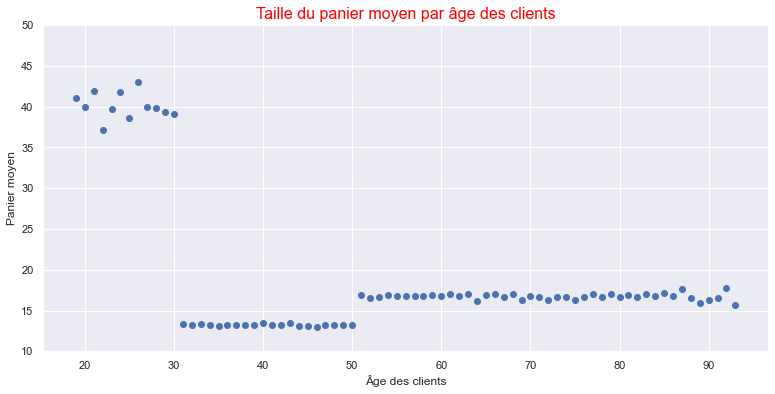

In [97]:
plt.figure(figsize=(13, 6))
plt.ylim(10,50)
plt.scatter(x='age', y='panier_moyen', data = age_ca)
plt.ylabel( 'Panier moyen')
plt.xlabel('Âge des clients')
plt.title("Taille du panier moyen par âge des clients",fontsize= 16, color = 'red')

In [98]:
print('La covariance est de:', np.cov(age_ca['age'], age_ca['panier_moyen'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['age'], age_ca['panier_moyen'])[0])

La covariance est de: -103.77223695449705
Le coefficient de corrélation linéaire est de: -0.5249823540512216


Conclusion:
Avec le test de Pearson, j’obtiens un coefficient de -0.524. Celà représente une corrélation légèrement négative des 2 variables.
On observe sur le graphique que:

- Les jeunes de moins de 31 ans ont un panier moyen plus élevé avec un montant assez constant (autour de 40 euros) .
- Les clients entre 31-50 ans ont une taille du panier moyen le plus basse avec un montant quasi constant (autour de 13 euros) , même si leur fréquence d’achat est la plus élevée.
- Les clients à partir de 50 ans ont une taille de panier moyen à montant quasi constant, mais un peu plus élevé (autour de 17 euros).

## 6.5 Lien entre l’âge des clients et les catégories des livres achetés


### Test d'une variable quantitative (âge) et une variable qualitative (catégories), je vais donc effectuer : 
- Une visualisation via boxplot
- Vérification de la possibilité d'utiliser ANOVA 
- Si c'est le cas, Test ANOVA


### 6.5.1 Visualisation via boxplot

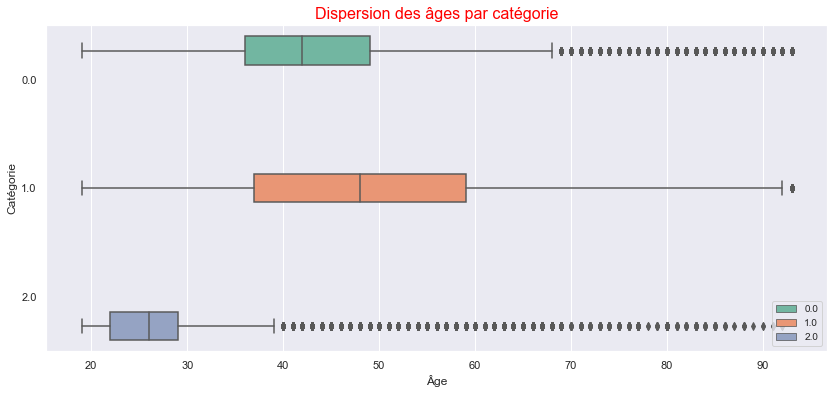

In [99]:
# Dispersion des âges des clients par catégorie
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
plt.figure(figsize=(14, 6))
sns.boxplot(y="categ", x="age", data = df_fusionne, orient='h', hue='categ', palette='Set2')
plt.title('Dispersion des âges par catégorie',fontsize= 16, color = 'red')
plt.xlabel('Âge')
plt.ylabel('Catégorie')
plt.legend(loc='lower right', fontsize=10)

### 6.5.2 Vérification de la possibilité d'utiliser la méthode ANOVA


#### Nous devons vérifier que la variable âge suit la loi normale

Avec un risque premier alpha de 5%, on émet les deux hypothèses suivantes:

- H0:la variable suit une loi normale
- H1:la variable ne suit pas une loi normale

In [100]:
ca_0 = df_fusionne[df_fusionne['categ'] == 0]['age']
ca_1= df_fusionne[df_fusionne['categ'] == 1]['age']
ca_2 = df_fusionne[df_fusionne['categ'] == 2]['age']

In [101]:
# Test la normalité pour les données de catégorie 0
test_stat_0 =kstest(ca_0, 'norm')
test_stat_0

KstestResult(statistic=1.0, pvalue=0.0)

In [102]:
# Test la normalité pour les données de catégorie 1
test_stat_1 =kstest(ca_1, 'norm')
test_stat_1

KstestResult(statistic=1.0, pvalue=0.0)

In [103]:
# Test la normalité pour les données de catégorie 2
test_stat_2 =kstest(ca_2, 'norm')
test_stat_2

KstestResult(statistic=1.0, pvalue=0.0)

#### La p-value est pour les 3 catégories égale à 0 : On rejette H0 et donc la catégorie âge ne suit pas la loi normale

### Conclusion : Comme le test n'est pas possible, nous allons transformer l'âge en une variable catégorie âge, pour pouvoir faire le test entre deux variables qualitatives

### 6.5.3 Modification pour avoir deux variables qualitatives

In [104]:
#Création de trois catégories d'âge dans les deux df principaux

categ_age = []

for row in df_fusionne.age:
    if row > 50:
        categ_age.append(">50")
    elif row > 30:
        categ_age.append("30-50")
    elif row >= 18:
        categ_age.append("18-29")
    else:
        categ_age.append(np.NaN)

df_fusionne['categ_age'] = categ_age

categ_age_commandes = []

for row in df_commandes.age:
    if row > 50:
        categ_age_commandes.append(">50")
    elif row > 30:
        categ_age_commandes.append("30-50")
    elif row >= 18:
        categ_age_commandes.append("18-29")
    else:
        categ_age_commandes.append(np.NaN)

df_commandes['categ_age'] = categ_age_commandes

In [105]:
df_fusionne

,client_id,sex,birth,age,id_prod,price,categ,date,session_id,hour,année,mois,jour,categ_age
0,c_4410,f,1967.0,55.0,1_385,25.99,1.0,2021-03-22,s_9707,01:40:22.782925,2021.0,3.0,22.0,>50
2,c_4410,f,1967.0,55.0,0_1110,4.71,0.0,2021-11-04,s_114715,16:28:30.169021,2021.0,11.0,4.0,>50
4,c_4410,f,1967.0,55.0,0_1111,19.99,0.0,2021-03-22,s_9707,01:27:49.480137,2021.0,3.0,22.0,>50
5,c_4410,f,1967.0,55.0,1_461,12.99,1.0,2021-08-11,s_74236,08:40:47.495793,2021.0,8.0,11.0,>50
6,c_4410,f,1967.0,55.0,1_461,12.99,1.0,2022-09-11,s_266422,08:40:47.495793,2022.0,9.0,11.0,>50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679306,c_84,f,1982.0,40.0,0_1438,9.31,0.0,2022-05-29,s_215697,06:11:50.316631,2022.0,5.0,29.0,30-50
679307,c_84,f,1982.0,40.0,0_1438,9.31,0.0,2022-03-29,s_186172,06:11:50.316631,2022.0,3.0,29.0,30-50
679308,c_84,f,1982.0,40.0,1_459,15.99,1.0,2022-12-17,s_313173,00:16:56.629536,2022.0,12.0,17.0,30-50
679309,c_84,f,1982.0,40.0,1_459,15.99,1.0,2022-02-17,s_166337,00:16:56.629536,2022.0,2.0,17.0,30-50


## 6.5.4 Analyse de deux données qualitatives 

- Tableau de contingence
- khi-deux
- Heatmap

### Tableau de contingence


In [106]:
x = 'categ_age'
y = 'categ'
cont_age = df_fusionne[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total' )
cont_age

categ,0.0,1.0,2.0,Total
categ_age,,,,
18-29,12255,20435,21839,54529
30-50,275902,84962,1353,362217
>50,65786,83827,1381,150994
Total,353943,189224,24573,567740


### Test de Khi2
Avec un risque premier alpha de 5%, on émet les deux hypothèses suivantes:
- H0: Les deux variables (les tranches d'âge des clients et les catégories des livres achetés ) sont indépendantes
- H1: les deux variables ne sont pas indépendantes

In [107]:
chi2, pvalue, degrees, expected = stats.chi2_contingency(cont_age)
chi2, degrees, pvalue

(244644.5397055377, 9, 0.0)

#### p-value = 0 < 0,05 : On rejette H0 et on conclut que les deux variables ne sont pas indépendantes

### Heatmap

In [108]:
# Réalisation d'une heatmap

# Tableau de contingence réel
df_fusionne.categ_age = df_fusionne.categ_age.astype("str")

X = "categ"
Y ="categ_age"
d = df_fusionne[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
d.head(3)

categ_age,18-29,30-50,>50
categ,,,
0.0,12255,275902,65786
1.0,20435,84962,83827
2.0,21839,1353,1381


In [109]:
cont=d.copy()
tx=df_fusionne[X].value_counts()
ty=df_fusionne[Y].value_counts()

cont.loc[:,"Total"]=tx
cont.loc["total",:]=ty
cont.loc["total","Total"]=len(df_fusionne)

cont

categ_age,18-29,30-50,>50,Total
categ,,,,
0.0,12255.0,275902.0,65786.0,353943.0
1.0,20435.0,84962.0,83827.0,189224.0
2.0,21839.0,1353.0,1381.0,24573.0
total,54529.0,362217.0,150994.0,581520.0


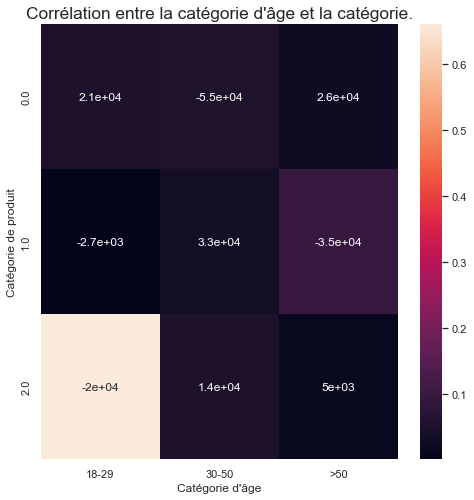

In [110]:
# Tableau de contingence théorique

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ['foo']
ty.columns= ['foo']
n = len(df_fusionne)
indep = tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep.drop(columns="nan", inplace=True)

mesure = (d-indep)**2/indep
xi_n = mesure.sum().sum()

plt.figure(figsize=(8,8))
sns.heatmap(mesure/xi_n, annot=indep - d)
plt.title("Corrélation entre la catégorie d'âge et la catégorie.", fontsize = 'x-large')
plt.xlabel("Catégorie d'âge")
plt.ylabel("Catégorie de produit")
plt.show()

Conclusion:

- Avec le heatmap, on trouve qu'il y a une forte corrélation entre les personnes âgés de moins de 25 ans et la catégorie 2 de produits: la catégorie 2 est la préférée des jeunes. Il serait donc opportun de cibler cette catégorie d'âge lors des campagne de publicité concernant les produits de la catégorie 2.